# Questions:
## 1- What is The Average Age of Patients?
## 2- What are The Top 10 Neighbourhoods in terms of Appointment?
##  3- Who Visits The Doctor More Often, Males or Females?

# PART ONE: Wrangling

## 1.1 Importing necessery Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

### Importing dataset from CSV File
#### Note: the 'r' symbol makes you import directory in wondows format, without the need to change slashes

In [2]:
no_show = pd.read_csv(r'C:\Users\anass\Desktop\Udacity\noshowappointments-kagglev2-may-2016.csv')

In [3]:
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## 1.2 dealing with misspelled words
#### Note: 'No-Show' needs to be changed because when used it shows as a minus Sign ('-'), so it needs to be dealt with

In [4]:
no_show.rename(columns = {'Alcoolism': 'Alcoholism',
                         'Hipertension': 'Hypertension',
                         'Handcap': 'Handicap',
                         'No-show': 'Status'}, inplace = True)

print(no_show.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Status'],
      dtype='object')


## 1.3 Check duplicates

In [5]:
no_show.duplicated().sum()

0

## 1.4 Changing Data Type
#### the  'ScheduledDay' and 'AppointmentDay' shows an Object type, this needs to be changed to datetime using to_datetime

In [6]:
no_show['ScheduledDay']= pd.to_datetime(no_show.ScheduledDay)
no_show['AppointmentDay'] = pd.to_datetime(no_show.AppointmentDay)
no_show.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
Status                         object
dtype: object

## 1.5 Calculating Awaiting Time
#### By creating a column named 'AwaitingTime' and subtract 'ScheduledDay' from 'AppointmentDay' and transform it to days

In [7]:
no_show['AwaitingTime'] = (no_show['AppointmentDay'] - no_show['ScheduledDay']).dt.days

## 1.6 Examining for Errors
#### we will use each column and apply the unique value method to get all unique values

In [8]:
print('Age values :',sorted(no_show.Age.unique()))
print('AwaitingTime values :',sorted(no_show.AwaitingTime.unique()))
print('Gender values :',no_show.Gender.unique())
print('Status values :',no_show.Status.unique())
print('Diabetes values :',no_show.Diabetes.unique())
print('Alcoholism values :',no_show.Alcoholism.unique())
print('Hypertension values :',no_show.Hypertension.unique())
print('Handicap values :',no_show.Handicap.unique())
print('Scholarship values :',no_show.Scholarship.unique())
print('SMS_received values :',no_show.SMS_received.unique())

Age values : [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
AwaitingTime values : [-7, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 114, 116, 118, 121, 122, 124, 125, 126, 131, 132, 138, 141, 145, 150, 154, 161, 168, 175, 178]
Gender val

#### we can see that the age has some unreasnoble values such as -1 and 0, or 115

### Here we will limit the age to exclude the values -1 and 0, and including as high as 97

In [9]:
# some ages are in -1 or 0 and as high as 100 or 115 which is imposible
no_show = no_show[(no_show.Age >= 0) & (no_show.Age <=97)]

### Lets check for outliers

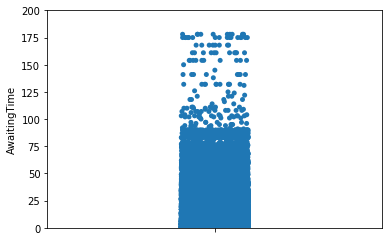

In [10]:
sbs.stripplot(data = no_show, y = 'AwaitingTime')
plt.ylim(0, 200)
plt.show()

# PART TWO: Exploring the Data
### Exploring Age using boxplot

<function matplotlib.pyplot.show(*args, **kw)>

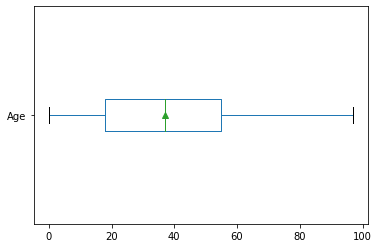

In [11]:
no_show['Age'].plot(kind='box', showmeans=True, vert=False)
plt.show

### get the 25th and 75th percintile to see the distribution of the ages

In [12]:
Age_Quantiles = no_show['Age'].quantile([0.25, 0.75])
Age_Quantiles

0.25    18.0
0.75    55.0
Name: Age, dtype: float64

### average age of Patients

In [13]:
no_show['Age'].mean()

37.07837441633185

### Visulaizing the top 10 appoitnment count by Neighbourhood

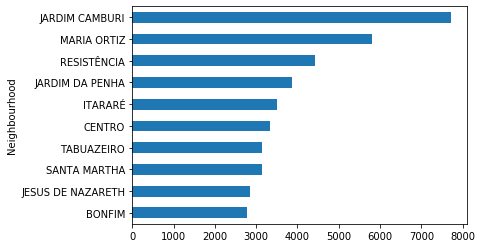

In [14]:
top_10_nh = no_show.groupby('Neighbourhood')['AppointmentDay'].count().sort_values().tail(10)

top_10_nh.plot(kind="barh")

Text(0.5, 1.0, 'Doctor Visits: Males Vs Females')

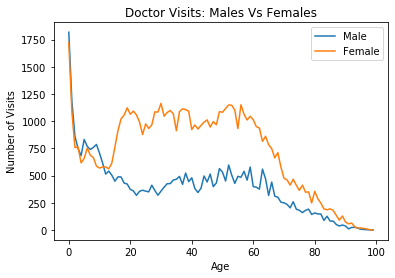

In [15]:
xy_range = range(100)
gender_df = no_show[no_show.Status == 'Yes'] # create new Dataframe and store the records where its status is 'Yes'
range_df = pd.DataFrame()
range_df['Age'] = xy_range # set the max value 100, that mean it will exclude outlier such as 115
men = range_df.Age.apply(lambda x: len(no_show[(no_show.Age == x) & (no_show.Gender == 'M')])) #store the column where gender = 'M'
women = range_df.Age.apply(lambda x: len(no_show[(no_show.Age == x) & (no_show.Gender == 'F')]))#store the column where gender = 'F'
plt.plot(xy_range,men) # plot males line which is indicated by the blue color
plt.plot(xy_range,women) # plot females line which is indicated by the red color
plt.legend(['Male','Female']) # set the legends
plt.xlabel('Age') # print the label of the x-axis as 'Age'
plt.ylabel('Number of Visits')
plt.title('Doctor Visits: Males Vs Females') # set title

# PART THREE: Findings
### Finding 1: i found out that most applicants ranges from 18 to 55, where is the average age is 37
### Finding 2: JARDIM CAMBURI is the highest visit count Neighbourhood between other Neighbourhood
### Finding 3-A: between age 0 and around 2 both male and female babies do visit the doctor in a very high count
### Finding 3-B: Even when the visits got plumeted in young ages, females are now much more often to visit doctor than males
